In [2]:
import pandas as pd
%conda install -c conda-forge pandasql

done
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.14.0
  latest version: 23.11.0

Please update conda by running

    $ conda update -n base -c conda-forge conda



# All requested packages already installed.

Retrieving notices: ...working... done

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandasql as psql
import random as rand


In [4]:
water = pd.read_csv('water_potability.csv')

In [5]:
water

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [6]:
seed_choice = 7
seed = rand.Random(7)

#Removing the NaN values for water data (only NaN values were in ph, sulfate and trihalomethanes)
waternonan = psql.sqldf('select * from water where ph is not null and Sulfate is not null and Trihalomethanes is not null')

In [7]:
#shuffling data
waternonan = waternonan.sample(frac=1)

waternonan

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
1256,5.226895,127.117555,7907.330441,6.761929,335.461842,475.332357,12.725010,79.420013,5.138056,1
405,5.555353,154.300684,20503.430055,9.644997,313.470297,355.206968,18.468690,75.140362,4.536146,0
1600,4.137045,116.338278,17101.951569,8.652210,322.892252,360.648078,7.848313,70.977001,4.327356,0
1984,5.713323,196.245706,11356.580481,8.027819,347.587583,300.125125,18.430084,44.860351,4.571128,1
1948,7.027297,185.838671,31151.615179,7.625545,327.221734,398.705017,19.461464,80.693568,3.392666,1
...,...,...,...,...,...,...,...,...,...,...
306,7.705711,178.922858,18476.619166,8.226228,334.889911,518.043369,10.638798,63.157489,3.861956,0
494,4.666148,171.288700,35680.067877,4.894374,314.613851,501.902864,14.210624,56.910254,4.556864,1
917,5.289618,194.056393,21776.170174,6.278293,359.099733,353.772930,14.181471,33.592031,4.548100,1
501,6.435723,214.724669,9363.853988,9.997624,273.463139,508.345207,12.925870,71.428590,4.925339,1


In [8]:
#checking no NaN anywhere
check_nan = waternonan['ph' or 'Trihalomethanes' or 'Hardness' or 'Solids' or 'Chloramines' or 'Sulfate' or 'Conductivity' or 'Organic_carbon' or 'Turbidity' or 'Potability'].isnull().sum()
print(check_nan)

0


In [9]:
#data visualisation
import matplotlib.pyplot as plt
import numpy as np

In [10]:
#plt.hist(waternonan.ph)

In [11]:
#plt.hist(waternonan.Trihalomethanes)


In [11]:
#plt.hist(waternonan.Hardness)


In [12]:
#plt.hist(waternonan.Solids)


In [13]:
#plt.hist(waternonan.Chloramines)


In [14]:
#plt.hist(waternonan.Sulfate)


In [15]:
#plt.hist(waternonan.Conductivity)


In [16]:
#plt.hist(waternonan.Organic_carbon)


In [17]:
#plt.hist(waternonan.Turbidity)


In [18]:
#plt.hist(waternonan.Potability)

In [12]:
#corellation heat map
import seaborn as sns

<AxesSubplot:>

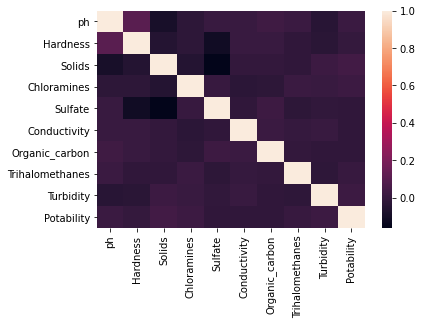

In [13]:
sns.heatmap(waternonan.corr())
#Upshot: not many extraneous variables

In [14]:
#Creating test-train split in data
import random as rand


In [15]:
# 80-20 split training data
index_list = seed.sample(range(2010), 1609)
train_set = waternonan.iloc[index_list]
train_set

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
800,7.086877,192.387368,25524.823470,7.354035,322.740031,548.917718,14.524408,64.124391,3.992848,0
339,5.906442,177.891369,27296.294045,8.869268,312.015798,385.812818,13.938686,60.613795,4.807496,0
1966,6.682097,228.303186,7705.298605,5.947350,363.536984,254.392306,13.140440,64.783954,3.449829,1
1063,5.345345,238.510230,10315.353973,7.822601,281.771707,496.350875,12.624613,87.342833,2.362886,0
530,7.685397,230.335708,7324.701425,7.991366,331.512533,492.850391,14.233952,74.068658,4.179187,0
...,...,...,...,...,...,...,...,...,...,...
11,6.660212,168.283747,30944.363591,5.858769,310.930858,523.671298,17.884235,77.042318,3.749701,0
1593,8.466013,224.174936,22523.124552,6.668868,286.943922,330.044715,17.744096,77.817804,3.946621,0
1015,6.980062,164.127180,17625.466412,6.479558,372.748319,492.703416,11.665753,48.710293,3.969463,0
1348,8.616824,228.762945,19126.298537,7.017578,327.894821,383.527023,14.759257,41.275927,4.584566,0


In [16]:
# test data
test_data = waternonan.iloc[waternonan.index.difference(index_list)]
test_data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
662,6.664935,218.770008,16477.350806,7.325001,299.846523,412.308588,17.192685,41.035789,4.502138,0
1852,10.337671,163.276225,21820.295875,7.899521,356.179637,561.206238,14.116324,56.193061,5.063109,0
904,7.583770,217.283262,36343.407055,8.532726,375.964391,393.877683,17.442301,77.722257,3.642289,0
1718,7.893313,220.348320,14444.289598,8.037400,300.152172,339.066071,18.423634,67.009098,4.097360,1
1499,5.896432,165.135658,23022.168945,7.536806,356.756191,401.740921,18.363573,80.124746,4.280793,1
...,...,...,...,...,...,...,...,...,...,...
870,3.590822,213.702299,33431.671122,5.542364,308.380612,465.630119,18.126924,50.081054,4.144781,0
60,8.490572,204.123648,22989.796390,8.270793,358.847115,435.000898,17.084246,62.421637,3.875557,0
447,8.129342,211.123312,22982.927445,6.779005,326.397953,367.988784,13.910933,55.795357,4.822044,1
501,6.435723,214.724669,9363.853988,9.997624,273.463139,508.345207,12.925870,71.428590,4.925339,1


In [17]:
#starting the pipeline
# preprocessing
from sklearn.preprocessing import Normalizer, StandardScaler, MinMaxScaler, PowerTransformer, MaxAbsScaler, LabelEncoder, QuantileTransformer, RobustScaler
from sklearn.feature_selection import VarianceThreshold, SelectFpr, f_classif
from sklearn.impute import SimpleImputer


# model training/tuning
from sklearn.pipeline import Pipeline, make_pipeline 
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.dummy import DummyClassifier
from sklearn.compose import ColumnTransformer


# models
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# model validation
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, recall_score, accuracy_score, make_scorer


# dataframe viewing rows
pd.set_option('display.max_rows', 100)

In [18]:
feature_list = ['ph', # indicate ph
                'Hardness', # indicates hardness
                'Solids', # indicates solids
                'Chloramines', # indicates Chloramines
                'Sulfate', # indicates Sulfate
                'Conductivity', # indicates Conductivity
                'Organic_carbon', # indicates Organic_carbon
                'Trihalomethanes', # indicates Trihalomethanes
                'Turbidity'] # indicates Turbidity

In [19]:
# define feature column data, list of features feature_list was created in the section above
X = waternonan[feature_list].values

# define label column
y = waternonan['Potability'].values

In [45]:
# make 75/25 train/test split, stratified because I have imbalanced label
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=seed_choice)

In [21]:
# check size of data splits
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1608, 9)
(403, 9)
(1608,)
(403,)


In [22]:
# Define scaler step of pipeline
scaler = Normalizer()

In [23]:
# Define machine learning models

# Logistic Regression:
lr = LogisticRegression(random_state=seed_choice)

# K-nearest Neighbors:
knn = KNeighborsClassifier(n_neighbors=5)

# Naive Bayes:
nb = GaussianNB()

# Random Forest:
rf = RandomForestClassifier(random_state=seed_choice, n_estimators=5, max_depth=10, min_samples_split=10, max_leaf_nodes=13)

# Gradient Boosted Trees:
gb = GradientBoostingClassifier()

# select model to train:
model_name = rf

In [24]:
# define function to get model metrics
def model_metrics(predictions, pipe):
    
    # print summary statistics
    print('Training set score: ' + str(pipe.score(X_train,y_train)))
    print('Test set score: ' + str(pipe.score(X_test,y_test)))
    print(classification_report(y_test, predictions, digits=5))

    # plot confusion matrix
    cm = confusion_matrix(y_test, predictions, normalize='all')
    print(cm)
    disp_cm = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipe.classes_)
    disp_cm.plot()

Training set score: 0.6648009950248757
Test set score: 0.6104218362282878
              precision    recall  f1-score   support

           0    0.00000   0.00000   0.00000       240
           1    0.40447   1.00000   0.57597       163

    accuracy                        0.40447       403
   macro avg    0.20223   0.50000   0.28799       403
weighted avg    0.16359   0.40447   0.23296       403

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

/Users/lachlan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lachlan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lachlan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


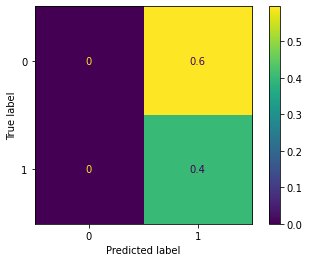

In [25]:
# make pipeline steps
pipe = make_pipeline(scaler,model_name)

# fit data to model
pipe.fit(X_train, y_train)

# save predictions on test set
predictions = model_name.predict(X_test)

# print summary statistics
print('Training set score: ' + str(pipe.score(X_train,y_train)))
print('Test set score: ' + str(pipe.score(X_test,y_test)))
print(classification_report(y_test, predictions, digits=5))
print(predictions)

# plot confusion matrix
cm = confusion_matrix(y_test, predictions, normalize='all')
print(cm)

ConfusionMatrixDisplay(confusion_matrix=cm).plot()

training model:LogisticRegression(random_state=7)
Training set score: 0.5970149253731343
Test set score: 0.5955334987593052
              precision    recall  f1-score   support

           0    0.00000   0.00000   0.00000       240
           1    0.40299   0.99387   0.57345       163

    accuracy                        0.40199       403
   macro avg    0.20149   0.49693   0.28673       403
weighted avg    0.16299   0.40199   0.23194       403

[[0.         0.5955335 ]
 [0.00248139 0.40198511]]
training model:KNeighborsClassifier()
Training set score: 0.7021144278606966
Test set score: 0.575682382133995
              precision    recall  f1-score   support

           0    0.61856   0.75000   0.67797       240
           1    0.46429   0.31902   0.37818       163

    accuracy                        0.57568       403
   macro avg    0.54142   0.53451   0.52807       403
weighted avg    0.55616   0.57568   0.55671       403

[[0.44665012 0.14888337]
 [0.27543424 0.12903226]]
training 

/Users/lachlan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lachlan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lachlan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lachla

training model:RandomForestClassifier(max_depth=10, max_leaf_nodes=13, min_samples_split=10,
                       n_estimators=5, random_state=7)
Training set score: 0.6648009950248757
Test set score: 0.6104218362282878
              precision    recall  f1-score   support

           0    0.00000   0.00000   0.00000       240
           1    0.40447   1.00000   0.57597       163

    accuracy                        0.40447       403
   macro avg    0.20223   0.50000   0.28799       403
weighted avg    0.16359   0.40447   0.23296       403

[[0.        0.5955335]
 [0.        0.4044665]]
training model:GradientBoostingClassifier()
Training set score: 0.8041044776119403
Test set score: 0.6178660049627791
              precision    recall  f1-score   support

           0    0.00000   0.00000   0.00000       240
           1    0.40447   1.00000   0.57597       163

    accuracy                        0.40447       403
   macro avg    0.20223   0.50000   0.28799       403
weighted avg  

/Users/lachlan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lachlan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lachlan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


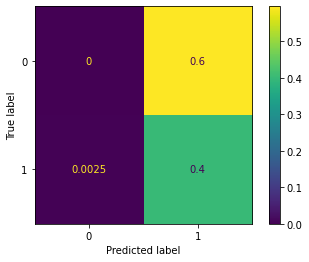

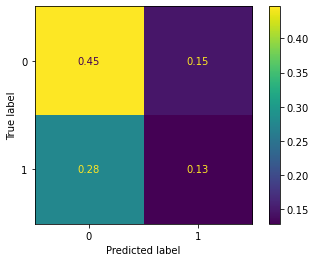

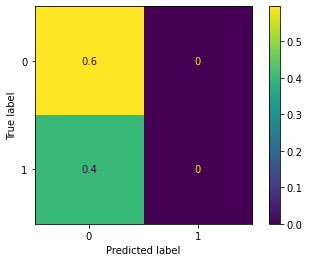

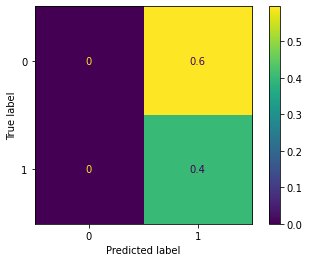

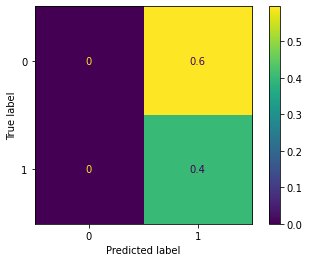

In [26]:
# create loop to test all models at once

model_names = [lr, knn, nb, rf, gb]
for name in model_names:
    print('training model:' + str(name))
    
    # define model name
    model_name = name
    
    # make pipeline steps
    pipe = make_pipeline(scaler,model_name)

    # fit data to model
    pipe.fit(X_train, y_train)

    # save predictions on test set
    predictions = model_name.predict(X_test)

    # print summary statistics
    print('Training set score: ' + str(pipe.score(X_train,y_train)))
    print('Test set score: ' + str(pipe.score(X_test,y_test)))
    print(classification_report(y_test, predictions, digits=5))
#for debugging
#    print(predictions)

    # plot confusion matrix
    cm = confusion_matrix(y_test, predictions, normalize='all')
    print(cm)
    ConfusionMatrixDisplay(confusion_matrix=cm).plot()

## Suggestions on how to improve predictions:
1. probably overfitting
2. tweak some parameters to see if it does stuff
3. simplify models
4. start analysing 



In [27]:
# This is a function I pulled from 
# https://stackoverflow.com/questions/37161563/how-to-graph-grid-scores-from-gridsearchcv

# For each hyperparamter it fixes all other parameters to their best values 
# and plots the average score for each value of the hyperparamter.


def plot_search_results(grid):
    
    # Results from grid search
    results = grid.cv_results_
    means_test = results['mean_test_score']
    stds_test = results['std_test_score']
    means_train = results['mean_train_score']
    stds_train = results['std_train_score']

    # Getting indexes of values per hyper-parameter
    masks=[]
    masks_names= list(grid.best_params_.keys())
    for p_k, p_v in grid.best_params_.items():
        masks.append(list(results['param_'+p_k].data==p_v))

    params=grid.param_grid

    # Ploting results
    fig, ax = plt.subplots(1,len(params),sharex='none', sharey='all',figsize=(20,5))
    fig.suptitle('Score per parameter')
    fig.text(0.04, 0.5, 'MEAN SCORE', va='center', rotation='vertical')
    pram_preformace_in_best = {}
    for i, p in enumerate(masks_names):
        m = np.stack(masks[:i] + masks[i+1:])
        pram_preformace_in_best
        best_parms_mask = m.all(axis=0)
        best_index = np.where(best_parms_mask)[0]
        x = np.array(params[p])
        y_1 = np.array(means_test[best_index])
        e_1 = np.array(stds_test[best_index])
        y_2 = np.array(means_train[best_index])
        e_2 = np.array(stds_train[best_index])
        ax[i].errorbar(x, y_1, e_1, linestyle='--', marker='o', label='test')
        ax[i].errorbar(x, y_2, e_2, linestyle='-', marker='^',label='train' )
        ax[i].set_xlabel(p.upper())

    plt.legend()
    plt.show()

In [28]:
# define parameter search for each model

# Logistic Regression:
lr = LogisticRegression(random_state=seed_choice, solver='liblinear', max_iter=1000)

lr_param_grid = {'logisticregression__penalty': ['l1', 'l2'],
                 'logisticregression__C': [0.001, 0.01, 0.1, 1.0, 10, 25]
                }

# K-nearest Neighbors:
knn = KNeighborsClassifier(n_neighbors=10)

knn_param_grid = {'kneighborsclassifier__n_neighbors': [3, 5, 7, 9],
                  'kneighborsclassifier__weights': ['uniform', 'distance'],
                  'kneighborsclassifier__p': [1,2]
                 }

# Naive Bayes:
nb = GaussianNB()
# There are no meaningful paramters to tune for Naive Bayes model so we willl accept the default implementation.

# Random Forest:
rf = RandomForestClassifier(random_state=seed_choice, n_jobs=-1)

rf_param_grid = {'randomforestclassifier__n_estimators': [5, 10, 25, 50, 100],
                 'randomforestclassifier__criterion': ['gini', 'entropy', 'log_loss'],
                 'randomforestclassifier__max_depth': [3, 5, 10, 16],
                 'randomforestclassifier__max_features': ['sqrt', 'log2', 9],
                 'randomforestclassifier__max_samples': [0.25, 0.5, 0.75, 1]
                }

# Gradient Boosted Trees:
gb = GradientBoostingClassifier(random_state=seed_choice)

gb_param_grid = {'gradientboostingclassifier__n_estimators': [10, 25, 50, 100],
                 'gradientboostingclassifier__loss': ['log_loss', 'exponential'],
                 'gradientboostingclassifier__learning_rate': [0.01, 0.1, 0.5, 1],
                 'gradientboostingclassifier__subsample': [0.1, 0.5, 0.75, 1],
                 'gradientboostingclassifier__max_depth': [3, 5, 10, 16],
                 'gradientboostingclassifier__max_features': ['sqrt', 'log2', 9],
                }

In [29]:
# define workflow to perform grid search on a model 
#  and print the summary statistics for the best parameters 
#   and plot the results of the cross validation.
def search_train_evaluate_plot(model_name, param_grid, scorer):
    
    # define pipeline
    pipe = make_pipeline(scaler,model_name)

    # define parameter search
    grid_search = GridSearchCV(pipe, param_grid, cv=4, refit = True, verbose = 1, return_train_score=True, scoring=scorer, n_jobs=-1) 

    # train the model on grid search 
    grid_search.fit(X_train, y_train) 

    # print best parameters after tuning 
    print(grid_search.best_params_) 
    best_predictions = grid_search.predict(X_test) 

    # print summary of metrics for best parameters
    model_metrics(best_predictions, grid_search)
    
    # plot results of grid search
    plot_search_results(grid_search)



Fitting 4 folds for each of 16 candidates, totalling 64 fits
{'kneighborsclassifier__n_neighbors': 9, 'kneighborsclassifier__p': 1, 'kneighborsclassifier__weights': 'uniform'}
Training set score: 0.6672885572139303
Test set score: 0.5905707196029777
              precision    recall  f1-score   support

           0    0.62058   0.80417   0.70054       240
           1    0.48913   0.27607   0.35294       163

    accuracy                        0.59057       403
   macro avg    0.55485   0.54012   0.52674       403
weighted avg    0.56741   0.59057   0.55995       403

[[0.47890819 0.11662531]
 [0.29280397 0.11166253]]


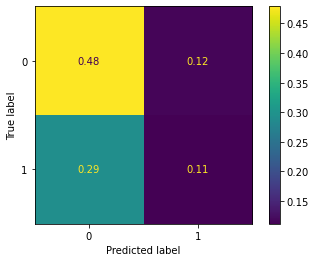

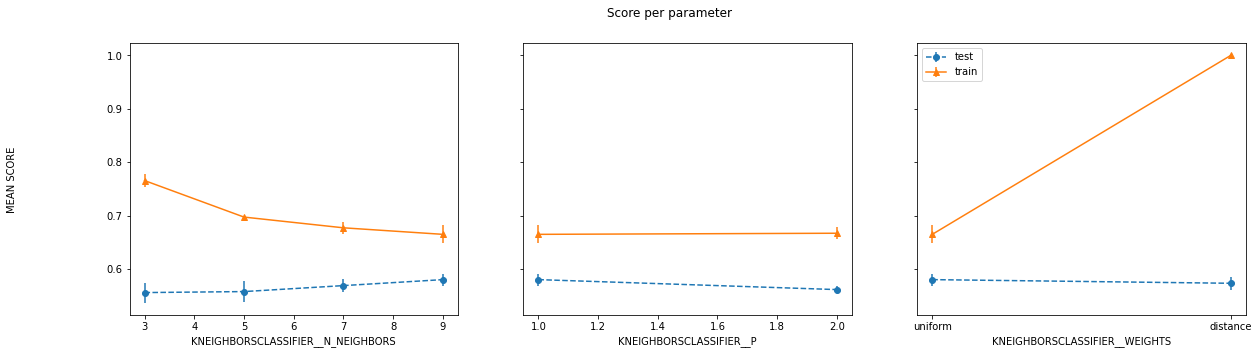

In [30]:
# define names for model
model_name = knn
param_grid = knn_param_grid
scorer = make_scorer(accuracy_score)
#scorer = make_scorer(recall_score)

# run model workflow
search_train_evaluate_plot(model_name, param_grid, scorer)

In [31]:
# define workflow for training and printing model evaluation metrics
def train_and_evaluate(scaler,model_name):
    
    # make pipeline steps
    pipe = make_pipeline(scaler,model_name)

    # fit data to model
    pipe.fit(X_train, y_train)

    # save predictions on test set
    predictions = pipe.predict(X_test)

    # display results and metrics
    model_metrics(predictions, pipe)


training model:LogisticRegression(max_iter=1000, random_state=7, solver='liblinear')
Fitting 4 folds for each of 12 candidates, totalling 48 fits
{'logisticregression__C': 0.001, 'logisticregression__penalty': 'l1'}
Training set score: 0.5970149253731343
Test set score: 0.5955334987593052
              precision    recall  f1-score   support

           0    0.59553   1.00000   0.74650       240
           1    0.00000   0.00000   0.00000       163

    accuracy                        0.59553       403
   macro avg    0.29777   0.50000   0.37325       403
weighted avg    0.35466   0.59553   0.44457       403

[[0.5955335 0.       ]
 [0.4044665 0.       ]]


/Users/lachlan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lachlan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lachlan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


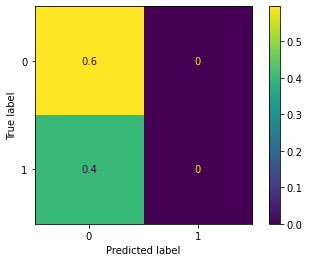

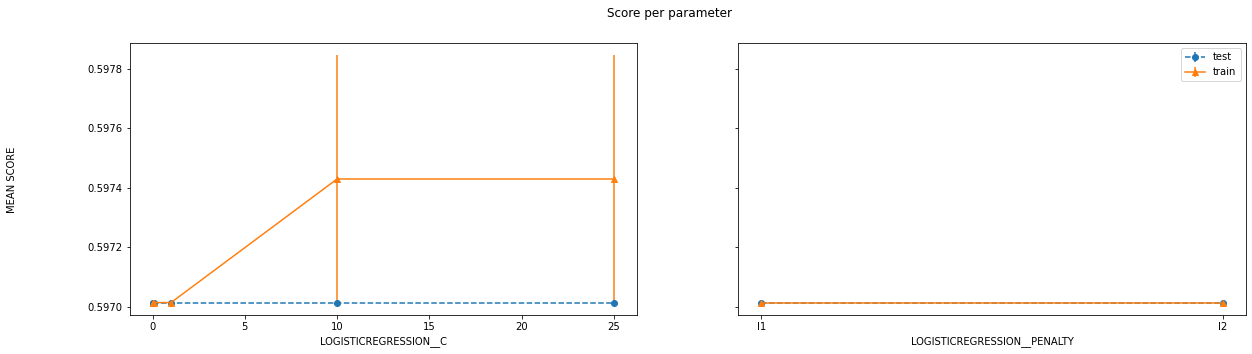

training model:KNeighborsClassifier(n_neighbors=10)
Fitting 4 folds for each of 16 candidates, totalling 64 fits
{'kneighborsclassifier__n_neighbors': 7, 'kneighborsclassifier__p': 2, 'kneighborsclassifier__weights': 'uniform'}
Training set score: 0.6871890547263682
Test set score: 0.5235732009925558
              precision    recall  f1-score   support

           0    0.58108   0.71667   0.64179       240
           1    0.36449   0.23926   0.28889       163

    accuracy                        0.52357       403
   macro avg    0.47278   0.47797   0.46534       403
weighted avg    0.49348   0.52357   0.49905       403

[[0.42679901 0.16873449]
 [0.30769231 0.09677419]]


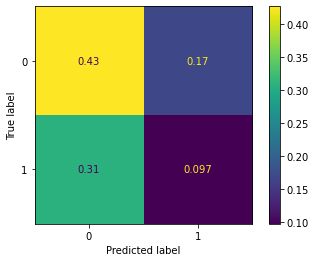

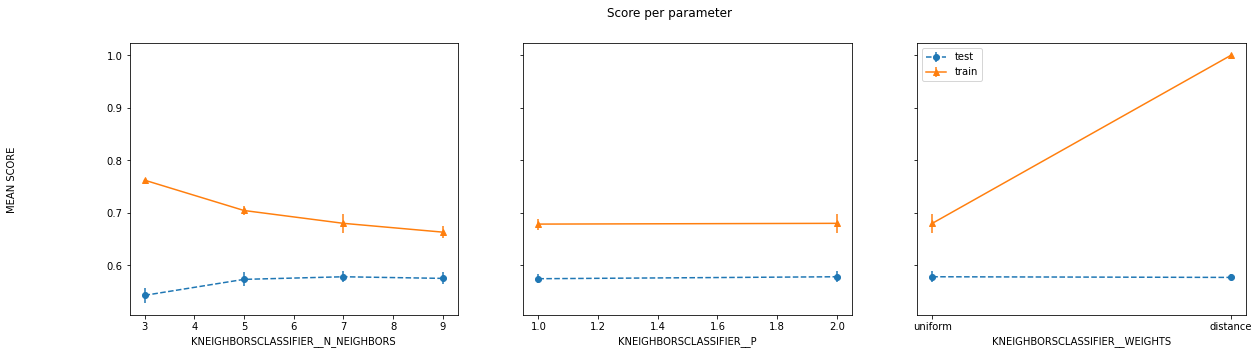

training model:GaussianNB()
Training set score: 0.4098258706467662
Test set score: 0.4317617866004963
              precision    recall  f1-score   support

           0    0.78947   0.06250   0.11583       240
           1    0.41406   0.97546   0.58135       163

    accuracy                        0.43176       403
   macro avg    0.60177   0.51898   0.34859       403
weighted avg    0.63763   0.43176   0.30412       403

[[0.03722084 0.55831266]
 [0.00992556 0.39454094]]
training model:RandomForestClassifier(n_jobs=-1, random_state=7)
Fitting 4 folds for each of 720 candidates, totalling 2880 fits
{'randomforestclassifier__criterion': 'entropy', 'randomforestclassifier__max_depth': 16, 'randomforestclassifier__max_features': 9, 'randomforestclassifier__max_samples': 0.75, 'randomforestclassifier__n_estimators': 100}
Training set score: 0.9900497512437811
Test set score: 0.6550868486352357
              precision    recall  f1-score   support

           0    0.66667   0.84167   0.7

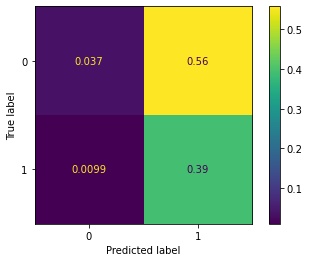

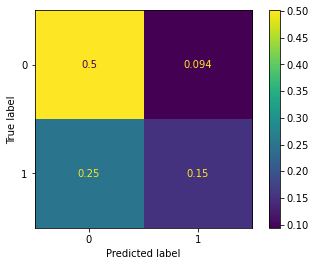

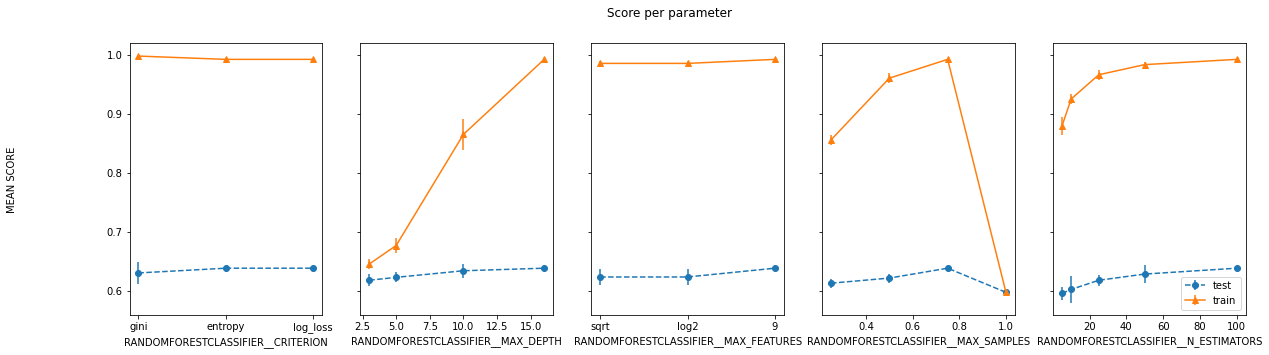

training model:GradientBoostingClassifier(random_state=7)
Fitting 4 folds for each of 1536 candidates, totalling 6144 fits
{'gradientboostingclassifier__learning_rate': 0.1, 'gradientboostingclassifier__loss': 'log_loss', 'gradientboostingclassifier__max_depth': 10, 'gradientboostingclassifier__max_features': 'sqrt', 'gradientboostingclassifier__n_estimators': 25, 'gradientboostingclassifier__subsample': 1}
Training set score: 0.9813432835820896
Test set score: 0.6451612903225806
              precision    recall  f1-score   support

           0    0.65696   0.84583   0.73953       240
           1    0.60638   0.34969   0.44358       163

    accuracy                        0.64516       403
   macro avg    0.63167   0.59776   0.59155       403
weighted avg    0.63650   0.64516   0.61983       403

[[0.50372208 0.09181141]
 [0.2630273  0.14143921]]


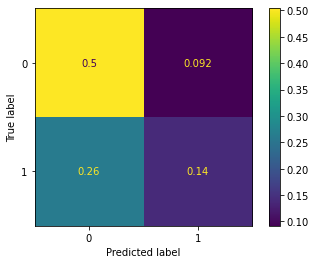

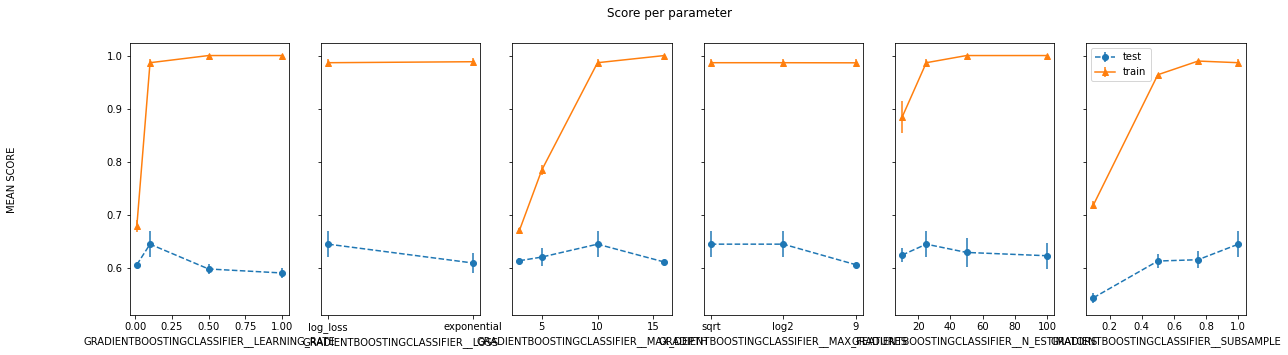

In [39]:
# create loop to test all models at once

scorer = make_scorer(accuracy_score)
#scorer = make_scorer(recall_score)

model_and_param_names = [[lr, lr_param_grid], [knn, knn_param_grid], [nb], [rf, rf_param_grid], [gb, gb_param_grid]]
for name in model_and_param_names:
    
    if name[0] == nb:
        
        print('training model:' + str(name[0]))
    
        train_and_evaluate(scaler,name[0])
    else:
        print('training model:' + str(name[0]))

        search_train_evaluate_plot(name[0], name[1], scorer)

In [32]:
# define best parameters for each model type

# Logistic Regression:
best_lr = LogisticRegression(random_state=seed_choice, solver='liblinear', max_iter=1000, penalty='l1', C=10)

# K-nearest Neighbors:
best_knn = KNeighborsClassifier(n_neighbors=9, weights='uniform', p=2)

# Naive Bayes:
best_nb = GaussianNB()
# There are no meaningful paramters to tune for Naive Bayes model so we willl accept the default implementation.

# Random Forest:
best_rf = RandomForestClassifier(random_state=seed_choice, criterion='gini', max_depth=5, max_features=9, max_samples=0.5, n_estimators=50)

# Gradient Boosted Trees:
best_gb = GradientBoostingClassifier(random_state=seed_choice, n_estimators=25, loss='log_loss', learning_rate=.1, subsample=0.75, max_depth=3, max_features=9)



In [33]:
# define workflow to perform grid search over model types 
#  and print the summary statistics for the best model 
#   and plot the results of the cross validation.

def model_search_train_evaluate_plot(scorer):
    
    # define model type parameters
    param_grid = [{'classifier': [best_lr]},
                  {'classifier': [best_knn]},
                  {'classifier': [best_nb]},
                  {'classifier': [best_rf]},
                  {'classifier': [best_gb]}
                 ]

    pipe = Pipeline([('scaler', scaler),
                     ('classifier', DummyClassifier())
                    ])
    
    
    
    # define parameter search
    grid_search = GridSearchCV(pipe, param_grid, cv=5, refit = True, verbose = 1, return_train_score=True, scoring=scorer, n_jobs=-1) 

    # train the model on grid search 
    grid_search.fit(X_train, y_train) 

    # print best parameters after tuning 
    print(grid_search.best_params_) 
    best_predictions = grid_search.predict(X_test) 

    # print summary of metrics for best parameters
    #model_metrics(best_predictions, grid_search)
    
    # print score for each fit
    print('mean test scores:' + str(grid_search.cv_results_['mean_test_score']))
    print('mean train scores:' + str(grid_search.cv_results_['mean_train_score']))
    x = np.arange(grid_search.cv_results_['mean_test_score'].shape[0])
    plt.plot(x, grid_search.cv_results_['mean_test_score'], 'bo-')
    plt.plot(x, grid_search.cv_results_['mean_train_score'], 'go-')
    
    plt.show()
    

Fitting 5 folds for each of 5 candidates, totalling 25 fits
{'classifier': RandomForestClassifier(max_depth=5, max_features=9, max_samples=0.5,
                       n_estimators=50, random_state=7)}
mean test scores:[0.59639519 0.57029082 0.44026431 0.62748786 0.62314003]
mean train scores:[0.59732605 0.66993128 0.44932698 0.68594354 0.69449707]


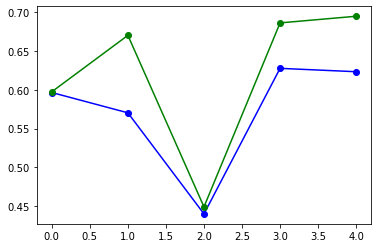

In [34]:
# choose scorer
scorer = make_scorer(accuracy_score)
#scorer = make_scorer(recall_score)

# search over model types
model_search_train_evaluate_plot(scorer)

In [35]:
## Best model is gradient boosted trees. We now undergo further parameter tuning

## How to fix this shit
Use the previous parameter tuning grid 

In [54]:
# Defining a finer parameter grid
# Gradient Boosted Trees:
gb = GradientBoostingClassifier(random_state=seed_choice)

#(random_state=seed_choice, n_estimators=25, loss='log_loss', learning_rate=.1, subsample=0.75, max_depth=3, max_features=9)

gb_param_grid = {'gradientboostingclassifier__n_estimators': [20, 25, 30, 40],
                 'gradientboostingclassifier__loss': ['log_loss'],
                 'gradientboostingclassifier__learning_rate': [0.04, 0.08, 0.1, 0.2],
                 'gradientboostingclassifier__subsample': [0.6, 0.7, 0.75, 0.85],
                 'gradientboostingclassifier__max_depth': [5, 7, 8, 10],
                 'gradientboostingclassifier__max_features': ['sqrt', 'log2'],
                }

Fitting 4 folds for each of 512 candidates, totalling 2048 fits
{'gradientboostingclassifier__learning_rate': 0.1, 'gradientboostingclassifier__loss': 'log_loss', 'gradientboostingclassifier__max_depth': 7, 'gradientboostingclassifier__max_features': 'sqrt', 'gradientboostingclassifier__n_estimators': 30, 'gradientboostingclassifier__subsample': 0.75}
Training set score: 0.9048507462686567
Test set score: 0.6004962779156328
              precision    recall  f1-score   support

           0    0.62382   0.82917   0.71199       240
           1    0.51190   0.26380   0.34818       163

    accuracy                        0.60050       403
   macro avg    0.56786   0.54649   0.53008       403
weighted avg    0.57856   0.60050   0.56484       403

[[0.49379653 0.10173697]
 [0.29776675 0.10669975]]


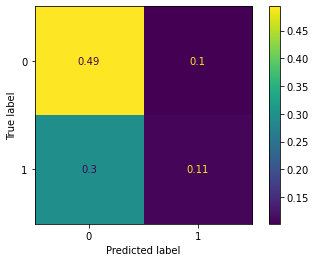

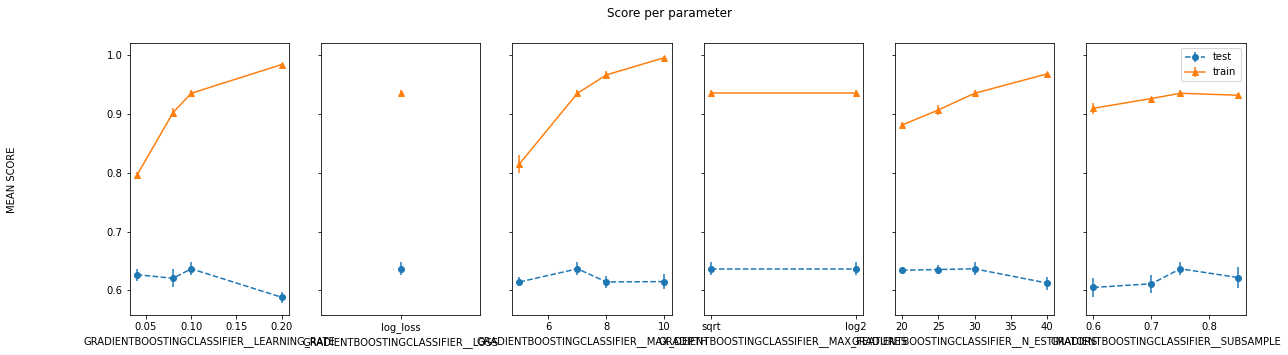

In [55]:
# define names for model
model_name = gb
param_grid = gb_param_grid
scorer = make_scorer(accuracy_score)
#scorer = make_scorer(recall_score)

# run model workflow
search_train_evaluate_plot(model_name, param_grid, scorer)